In [11]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [12]:
dataOutput = '/home/olivia/mothPruning/mothMachineLearning_dataAndFigs/DataOutput/Experiments/pruned_bias/'

modeltimestamp = '2022_11_05__01_04_10'

modelSubdir = os.path.join(dataOutput, modeltimestamp)
if not os.path.exists(modelSubdir):
    os.mkdir(modelSubdir)
    
Subdir = os.path.join(modelSubdir, 'preprocessedNets')
if not os.path.exists(Subdir):
    os.mkdir(Subdir)

historyFile = 'errors_minmax_Adam5.pkl'
history = pickle.load(open(os.path.join(modelSubdir, historyFile), 'rb'))

weightsFile = 'weights_minmax_Adam5.pkl'
weights = pickle.load(open(os.path.join(modelSubdir, weightsFile), 'rb'))

biasesFile = 'biases_minmax_Adam5.pkl'
biases = pickle.load(open(os.path.join(modelSubdir, biasesFile), 'rb'))

masksFile = 'masks_minmax_Adam5.pkl'
masks = pickle.load(open(os.path.join(modelSubdir, masksFile), 'rb'))

bmasksFile = 'bmasks_minmax_Adam5.pkl'
bmasks = pickle.load(open(os.path.join(modelSubdir, bmasksFile), 'rb'))

lossesFile = 'allPruneLosses_minmax_Adam5.pkl'
losses = pickle.load(open(os.path.join(modelSubdir, lossesFile), 'rb'))

epochlossesFile = 'lossesAllNets_Adam5.pkl'
epochlosses = pickle.load(open(os.path.join(modelSubdir, epochlossesFile), 'rb'))

In [13]:
len(weights[0])

5

In [14]:
networks = []

#Iterate over networks
for i in range(weights[0][0].shape[0]):
    prunes = []
    #Iterate over prunes
    for j in range(len(weights)):
        layers = []
        #Iterate over layers
        for k in range(len(weights[0])):
            w = np.multiply(weights[j][k][i], masks[j][k][i])
            b = np.multiply(biases[j][k][i], bmasks[j][k][i])
            layers.append(w)
            layers.append(b)
        prunes.append(layers)
    networks.append(prunes)

In [15]:
epochlosses = np.array(epochlosses)

In [16]:
epochLossesFlat = np.zeros((1,400))
#1 by number of networks trained 
for i in range(len(epochlosses)):
    epochLossesFlat = np.append(epochLossesFlat,epochlosses[i], axis=0)
    
epochLossesFlat = np.delete(epochLossesFlat, 0, 0)

In [17]:
import matplotlib.pyplot as plt

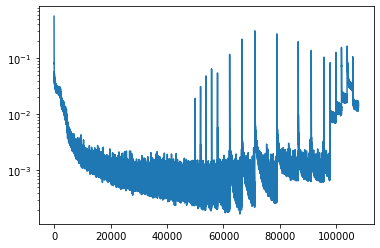

In [18]:
plt.plot(epochLossesFlat[:,0])
plt.yscale('log')

In [19]:
pickle.dump(weights, open(os.path.join(Subdir, 'weights.pkl'), 'wb'))
pickle.dump(biases, open(os.path.join(Subdir, 'biases.pkl'), 'wb'))
pickle.dump(masks, open(os.path.join(Subdir, 'masks.pkl'), 'wb'))
pickle.dump(bmasks, open(os.path.join(Subdir, 'bmasks.pkl'), 'wb'))
pickle.dump(history, open(os.path.join(Subdir, 'meanHistory.pkl'), 'wb'))
pickle.dump(networks, open(os.path.join(Subdir, 'networks.pkl'), 'wb'))
pickle.dump(losses, open(os.path.join(Subdir, 'pruneLosses.pkl'), 'wb'))
pickle.dump(epochLossesFlat, open(os.path.join(Subdir, 'epochLosses.pkl'), 'wb'))

In [20]:
ind=0
for i in range(len(epochlosses)):
    ind += len(epochlosses[i])
    print(str(i)+':'+str(ind))

0:50000
1:51900
2:53800
3:55800
4:57900
5:62200
6:66500
7:71100
8:78900
9:86500
10:91100
11:95600
12:97800
13:99800
14:101800
15:103800
16:105800
17:107800
